<a href="https://colab.research.google.com/github/robmonday/pytorch-sandbox/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an end-to-end example of the PyTorch workflow

Resources
* Ground truth notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook: https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question: https://github.com/mrdbourke/pytorch-deep-learning/discussions

X is sometimes called 'features'
y is sometimes called 'labels'

When hyperparameters are saved as variables, the names are usually in call caps:
ex. EPOCHS, LR, MODEL_NAME, etc..

In [ ]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all buildingblocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version

torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

In machine learning, data can be almost anything!
* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data in to numerical representation
1. Build a model to learn patters in that numerical representation

To showcase this, lets create some *known* data using the linear regression formula.  We'll use a linear regression formula to make a straight line with *known* **parameters**

In [ ]:
# Create *known* parameters
weight = 0.7 # like slope
bias = 0.3 # like intercept

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting datat into training and test sets (very important concept)

Let's create a training and test set with our data

In [ ]:
# Create a train/test split
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """Plots training data, test data and compares predictions"""
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

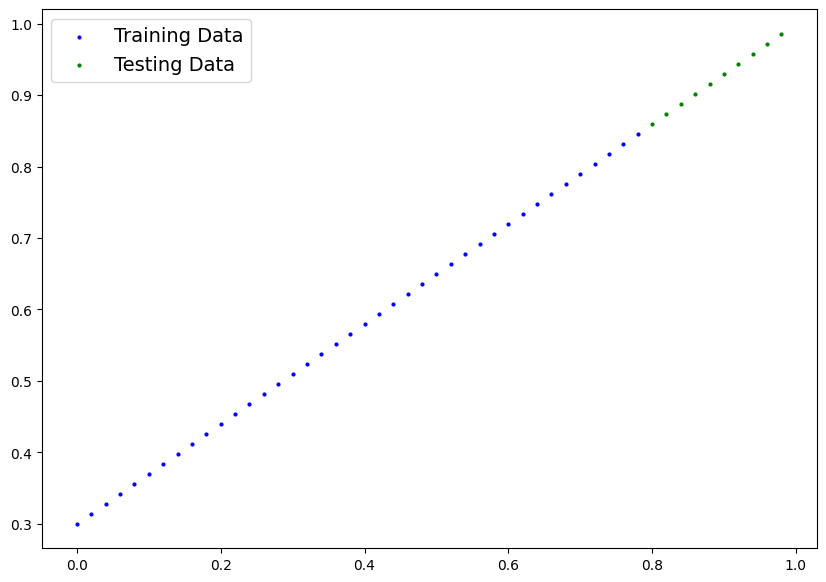

In [ ]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (get closer to) the ideal values (weight and bias values we used to create the data)

How does it do this?
* Gradient descent
* Back propagation

In [ ]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # Base class for all neural network modules (almost everything in PyTorch inherits from nn.Module)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # forward method to define the computation in the model, should be defined anytime nn.Module is subclassed
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # this is the linear regression formula



### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.parameter - what parameters should our model try and learn? Often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules.  If you subclass it, you should override the forward method.
  forward() defines what happens for computation
* torch.optim - this is where the optimizers in PyTorch live. They will help with gradient descent.


In [ ]:
torch.randn(1) # different every time because no manual seed

tensor([-0.5188])

### Checking the contents of our PyTorch model

Now that we've created a model, lets see whats inside...

We can check out our parameters (whats inside our model) using .parameters()

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of our model (a subclass of nn.Module)
model_0 = LinearRegressionModel()
model_0

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

The premise of deep learning is to start with random numbers, and slowly progress to more ideal numbers

### Making predictions using `torch.inference_mode()`

To check our models predictive power, lets see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it will run through the forward method.

In [ ]:
# X_test, y_test

In [ ]:
# Make predictions with model
with torch.inference_mode():  # using context manager with inference mode disables training functionality that has to keep track of gradients, so it runs faster
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

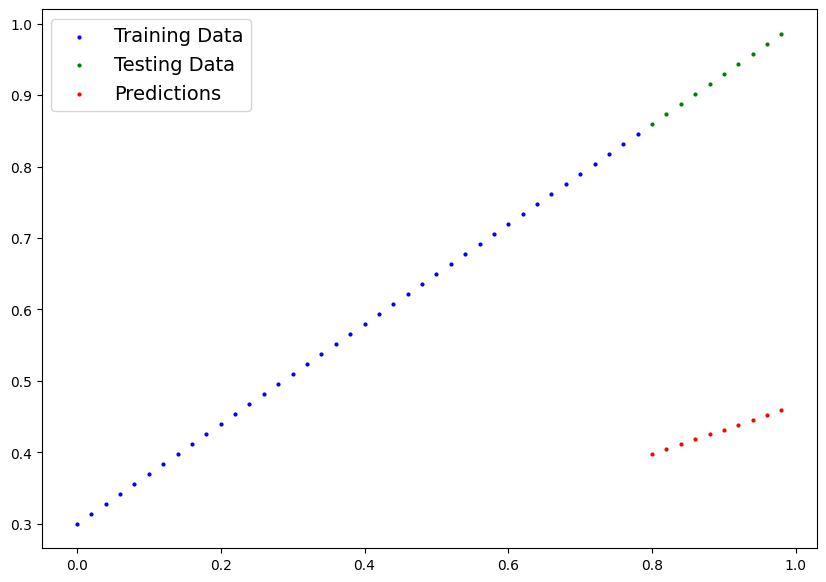

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to move from unknown (possibly random) parameters to known parameters.  
From a poor representation of the data to a better representation of the data.
One way to measure how poor/wrong your models' predictions are, is to use a loss function (aka criterion or cost function in other domains).

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account loss of a amodel and adjusts the model's parameters (eg. weight & bias in our case) to improve the loss function.
* A Training Loop \*
* A Testing Loop \*

\* Specific to PyTorch

In [ ]:
# Check out our models parameters
# list(model_0.parameters())
model_0.state_dict() # best way

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# the Loss Function and Optimizer work in tandem

# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent is most popular) - stochastic means random starting adjustments
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01)

Learning rate (lr) is possibley the most important hyperparameter you can set
* the smaller the learning rate, the smaller the change in the parameter

In [ ]:
loss_fn

L1Loss()

### Building a training loop (and testing loop) in PyTorch

Things we need in a training loop:
0. Loop through the data
0. Forward pass (involves data moving through our models `forward()` functions) to make predictions on data - also called 'forward propogation'
0. Calculate the loss (compare forward pass predictions to ground truth labels)
0. Optimizer zero grad
0. Loss backward - move backward through the network to calc the gradients of each parameter with respect to the loss. (**backpropagation**)
0. Optimizer step - use the optimizer to adjust our models parameter to try and improve the loss (**gradient descent**)


A gradient is simply a slope

A hyperparameter is a parameter is set by the machine learning practitioner, not set by the data itself

In practice, you can put the loop into a fucntion

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data...
epochs = 200

# Track different values (so that we can compare future experiments to past experiments)
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # turns on gradient tracking

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad() # prevents optimizer from accumulating gradients

  # 4. Perform backpropagation on the loss with respect to model parameters
  loss.backward() # compute the gradient for every parameter with `requires_grad = True`

  # 5. Step the optimizer
  # by default, how the optimizer changes will accumulate through the loop,
  # need to 'start fresh' at each iteration, so we have to zero them above in step 3 for next iteration of the loop
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different settings in the model not needed

  with torch.inference_mode(): # turns off gradient tracking (and other similar) to make code faster

    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # print results after every 10 epochs
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss {loss} | Test loss: {test_loss}")

    # Print out model state dict
    print(model_0.state_dict())


Epoch: 0 | Loss 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

Note: convergence is another word for minimum

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

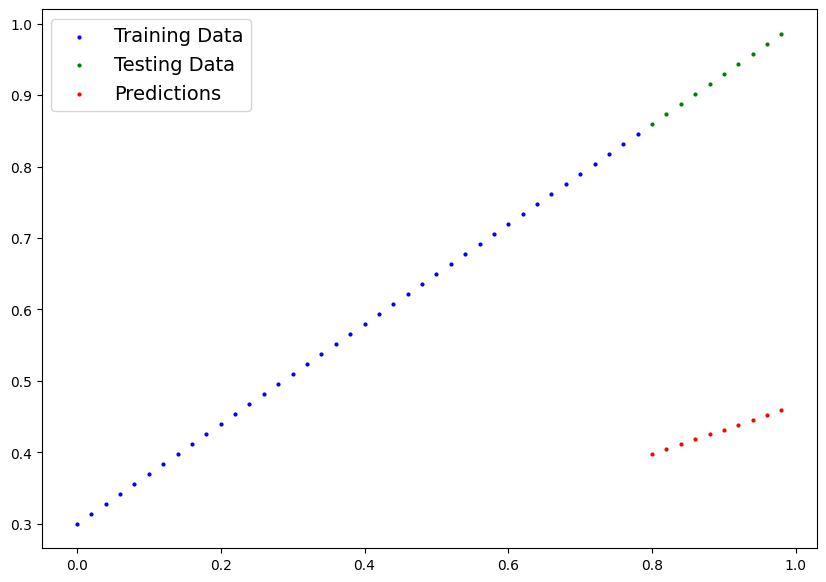

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

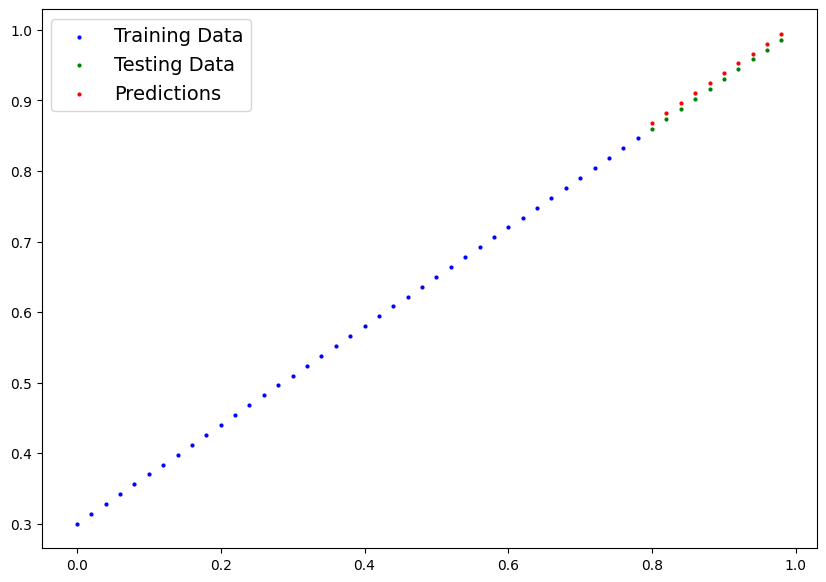

In [ ]:
plot_predictions(predictions=y_preds_new)

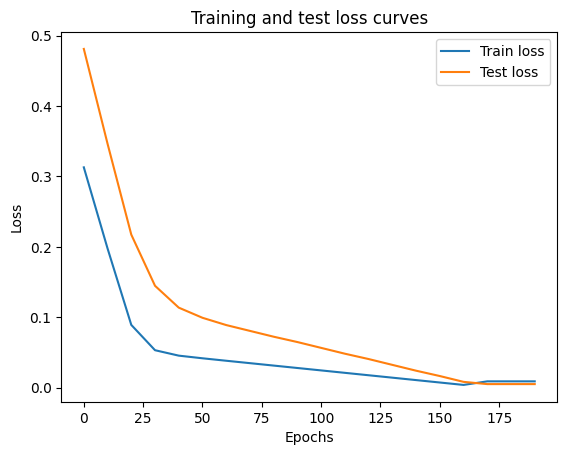

In [ ]:
# Plot the loss curves
# epoch_count, loss_values, test_loss_values

# Matplotlib uses numpy arrays, so we need to convert our tensors to numpy arrays
# epoch_count_arr = np.array(torch.tensor(loss_values).numpy())

import numpy as np

plt.plot(epoch_count, torch.tensor(loss_values).detach().numpy(), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



## Saving a model in PyTorch

There are three ways to save and load PyTorch models:
1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models") # Create path object
MODEL_PATH.mkdir(parents=True, exist_ok=True) # Create folder at path indicated

# 2. Create a models save path
MODEL_NAME = "01_pytorch_workflow_model.pt" # Create string for filename
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME # create path object to save file
MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH # accepts a path object
          )

Saving model to: models/01_pytorch_workflow_model.pt


## Loading a PyTorch model

Since we saved out model's `state_dict()` (rather than the entire model), we'll create a new instance of our model class and load the saved `state_dict()`

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved `state_dict()`, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel() # initially instantiates with random parameters

state_dict_to_load = torch.load(f=MODEL_SAVE_PATH)
print(f"Ready to load {state_dict_to_load}")

#Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
print('loading...')
loaded_model_0.load_state_dict(state_dict_to_load)

Ready to load OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
loading...


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__


'2.0.1+cu118'

Create device-agnostic code:  if we've got access to a GPU, our code will use it (to be faster); otherwise use CPU.

In [ ]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [ ]:
!nvidia-smi

Thu Jun 22 20:40:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    29W /  70W |    821MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 6.1 Data

In [ ]:
# Create some data using the linear regression formula y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze we have dimensionality issues that will cause errors
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

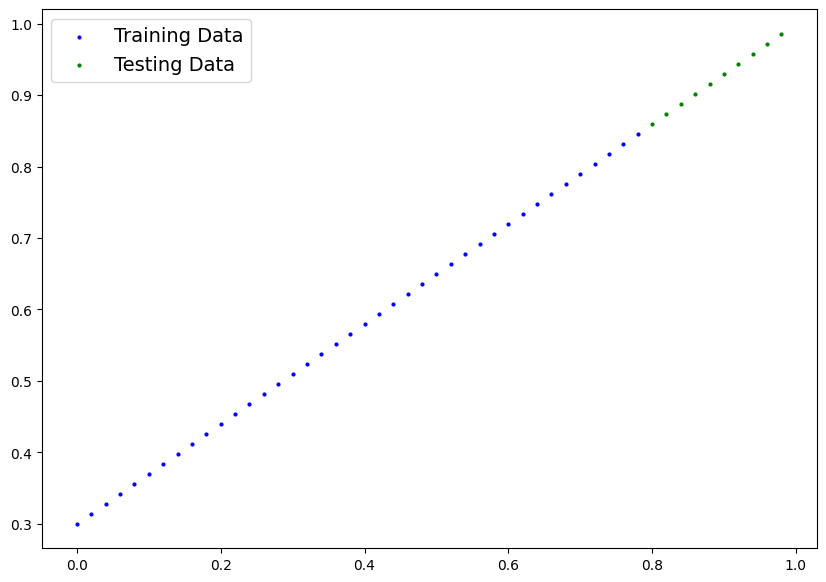

In [ ]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed (for reproducibility)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
# Check the model's current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # this is Mean Absolute Error (MAE)

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
weight, bias # very close to values in `state_dict()`!

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [ ]:
# Switch model to evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

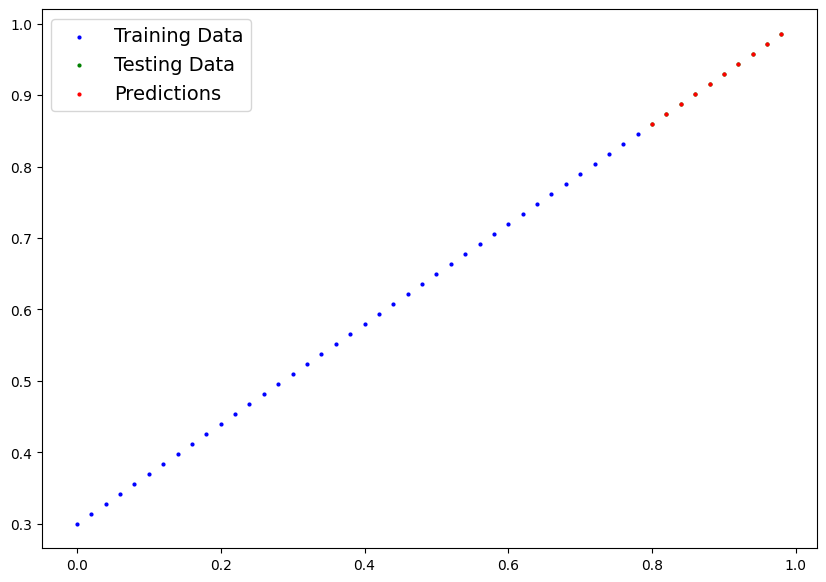

In [ ]:
# Visualize, Visualize, Visualize
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [90]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [91]:
# Save a model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a models save path
MODEL_NAME = "01_pytorch_workflow_model_1.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model to state_dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


Saving model to models/01_pytorch_workflow_model_1.pt


In [96]:
# Load a model
loaded_model_1 = LinearRegressionModelV2() # initially instantiates model with random parameters (state not yet loaded)

model_state_dict = torch.load(f=MODEL_SAVE_PATH) # get the state_dict from the path

loaded_model_1.load_state_dict(model_state_dict) # load the state_dict into the model

# Send the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [98]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [99]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [100]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')